In [56]:
from scipy.optimize import root
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import math

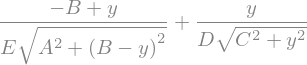

In [57]:
A, B, C, D, E, y = sp.symbols('A B C D E y')

def t(y):
    return 1/D * sp.sqrt(C**2 + y**2) + 1/E * sp.sqrt((B-y)**2 + A**2)

def dxt(y):
    return sp.diff(t(y), y)
sp.init_printing()
dxt(y)

In [58]:
# Numerische Funktionen für t(y) und dxt(y)
t_numeric = sp.lambdify(y, t(y), modules='numpy')
dxt_numeric = sp.lambdify(y, dxt(y), modules='numpy')

# Beispielparameter
A_val = 5
B_val = 12
C_val = 8
D_val = 2
E_val = 3

# Wertebereich für y
y_vals = np.linspace(-10, 20, 500)

# Berechnung der Funktionen für die gegebenen Parameter
t_values = t_numeric(y_vals)
dxt_values = dxt_numeric(y_vals)

# Graphen erstellen
plt.figure(figsize=(10, 6))

# Funktion t(y)
plt.subplot(2, 1, 1)
plt.plot(y_vals, t_values, label='t(y)')
plt.xlabel('y')
plt.ylabel('t(y)')
plt.title('Funktion t(y)')
plt.legend()

# Ableitung dxt(y)
plt.subplot(2, 1, 2)
plt.plot(y_vals, dxt_values, label="t'(y)")
plt.xlabel('y')
plt.ylabel("t'(y)")
plt.title("Ableitung von t(y) nach y")
plt.legend()

plt.tight_layout()
plt.show()

TypeError: loop of ufunc does not support argument 0 of type Add which has no callable sqrt method

In [59]:
#plott t(y)
# Erstellen des Graphen
x = np.linspace(0, A, 100)
y = np.linspace(0, B, 100)
X, Y = np.meshgrid(x, y)
Z = t(y)

start_value = [A / 2, B / 2]
result = root(t, start_value, jac=dxt)
optimal_position = result.x

plt.contourf(X, Y, Z, levels=100, cmap='viridis')
plt.colorbar(label='f(x, y)')
plt.xlabel('A Meter Entfernung zum Ufer')
plt.ylabel('B Meter entfernt entlang des Ufers')
plt.title('Optimale Position des Rettungsschwimmers')
plt.scatter(optimal_position[0], optimal_position[1], color='red', label='Optimale Position')
plt.legend()
plt.show()



TypeError: Cannot interpret '1.0*A' as a data type